<a href="https://colab.research.google.com/github/JossefaRodriguez/Clasificacion_-Optimizacion_Hiperparametros/blob/main/Clasificaci%C3%B3n_y_Optimizaci%C3%B3n_de_Hiperpar%C3%A1metros_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Importar librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from scipy.stats import loguniform
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [56]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE7/insurance.csv"
df = pd.read_csv(path)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Este dataset contiene información sobre 1,338 personas aseguradas y está compuesto por 7 variables independientes (edad, sexo, índice de masa corporal, hijos, hábito de fumar, región, etc.) más 1 variable objetivo: charges, que representa el costo del seguro médico.

El objetivo del análisis es entender cómo estas características personales influyen en el precio del seguro

In [59]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Análisis Exploratorio de Datos (EDA) Inicial

In [61]:
# comenzaremos identificando posibles valores nulos
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [62]:
# verificaremos valores duplicados dentro del dataset
df.duplicated().sum()

np.int64(1)

In [63]:
# Se elimina el registro duplicado del DataFrame original dado que se encontro un registro
df = df.drop_duplicates()

# Se verifica que ya no haya duplicados
print("Registros después de eliminar duplicados:", len(df))

Registros después de eliminar duplicados: 1337


In [64]:
# Se toma una muestra aleatoria del dataset para conocer el comportamiento de algunos datos
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1295,20,male,22.000,1,no,southwest,1964.78000
436,22,male,31.730,0,no,northeast,2254.79670
230,42,female,36.195,1,no,northwest,7443.64305
104,34,female,27.500,1,no,southwest,5003.85300
907,44,female,32.340,1,no,southeast,7633.72060
1207,36,male,33.400,2,yes,southwest,38415.47400
419,63,female,26.980,0,yes,northwest,28950.46920
1081,32,male,27.835,1,no,northwest,4454.40265
501,43,male,26.030,0,no,northeast,6837.36870
328,64,female,33.800,1,yes,southwest,47928.03000


In [65]:
# La variable smoker aparece como object y es un bool por ende lo cambiaremos para futuros analisis con variables numericas.
df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)


/tmp/ipython-input-65-2471940292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)
/tmp/ipython-input-65-2471940292.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'].replace({'yes': 1, 'no': 0}, inplace=True)
/tmp/ipython-input

In [66]:
# se comprueba el cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [67]:
# se realizará un analisis estadistico descrptivo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


#### Analisis

- respecto a la variable edad existe una distribucion simetrica, sin presencia de valores atipicos
- en cuanto al bmi o imc la media se encuentra en el limite entre sobrepeso y obesidad y pudiesen existen valores outliers
- en cuanto a la cantidad de hijos, el rango se encuentra entre 0 y 5 y gran parte tiene entre 0 y 2 hijos por lo que la distribución esta sesgada a valores bajos
- por ultimo el chargues o costo medico tiene una distribucion sesgada a la derecha con posibles valores fuera de rango que podria interpretarse en altos costos medicos por perfiles de alto riesgo o condiciones medicas.

In [68]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,int64
region,object
charges,float64


In [69]:
# Seleccionar solo columnas numericas
col_num = df.select_dtypes(include=['int64', 'float64'])

# Calcular Q1, Q3 e IQR para todas las columnas numericas
Q1 = col_num.quantile(0.25)
Q3 = col_num.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers
outliers = (col_num < (Q1 - 1.5 * IQR)) | (col_num > (Q3 + 1.5 * IQR))

# Filtrar filas que tienen al menos un outlier en alguna columna
atipicos = col_num[outliers.any(axis=1)]

atipicos


,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
11,62,26.290,0,1,27808.72510
14,27,42.130,0,1,39611.75770
19,30,35.300,0,1,36837.46700
23,34,31.920,1,1,37701.87680
...,...,...,...,...,...
1314,30,23.655,3,1,18765.87545
1317,18,53.130,0,0,1163.46270
1321,62,26.695,0,1,28101.33305
1323,42,40.370,2,1,43896.37630


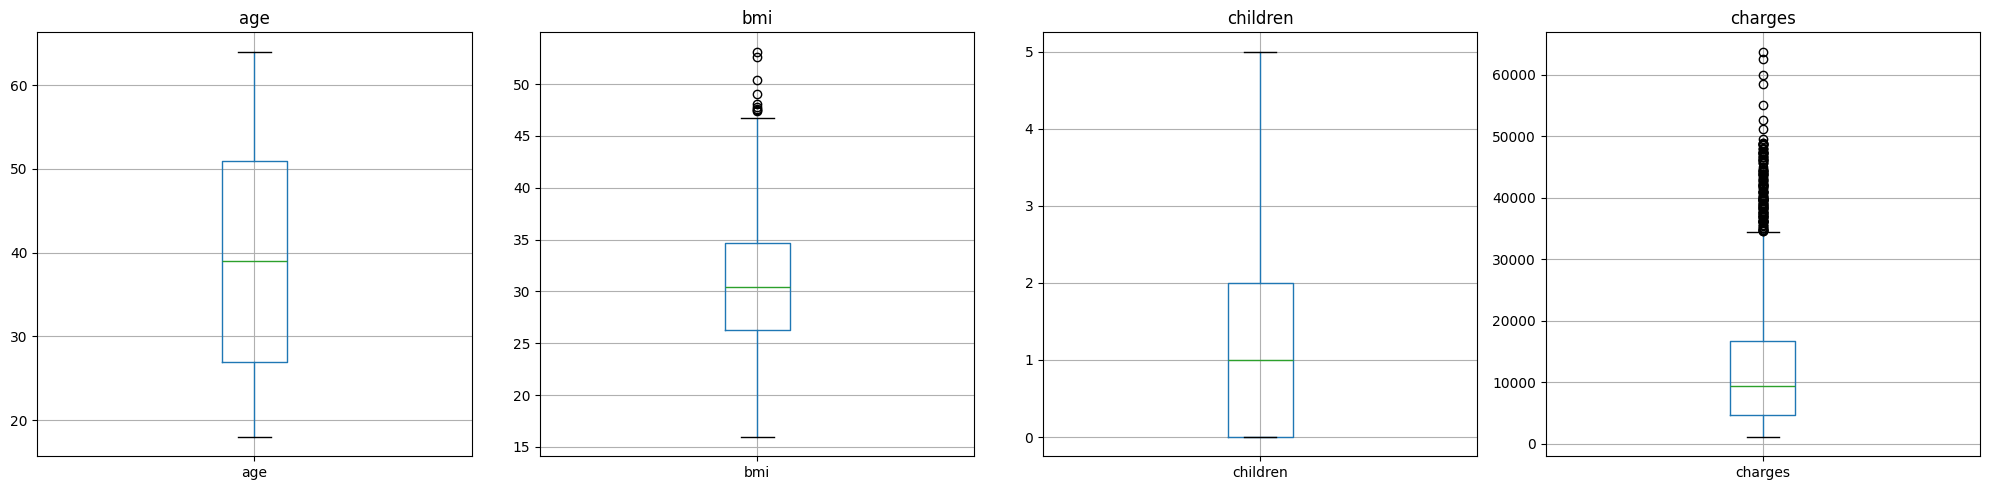

In [70]:
# Para comprender mejor los valores atipicos, se generaran visualizaciones tipo boxplot para cada variable

# Filtrar variables numéricas excluyendo 'smoker'
col_num_filtradas = [col for col in col_num if col != 'smoker']
n_vars = len(col_num_filtradas)

# Calcular número de filas y columnas para la grilla
n_cols = 4
n_rows = math.ceil(n_vars / n_cols)

# Crear figura con grilla ajustada
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Graficar cada boxplot en su eje correspondiente
for i, col in enumerate(col_num_filtradas):
    df.boxplot(column=col, ax=axes[i], vert=True)
    axes[i].set_title(col)

# Eliminar subplots vacíos si sobran
for j in range(n_vars, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




####Analisis
- la variable edad no contiene valores atipicos, asi como tambien children
- En el caso de imc la distribucion esta centrada entre 25 y 35 aprox. Existen valores sobre el 45 -50 lo que nos indicaria personas con obesidad severa pero no son valores erroneos, ya que se pudiese dar el caso por ende se mantendran esos valores.
- En el caso de costo charges,la distribucion esta entre los 5000 y 15000 us sin embargo existe valores atipicos con costos sobre los 40000 lo que nos puede hacer suponer que los valores mas altos corresponden a personas con mayores factores de riesgo por ende tampoco serían valores erroneos, ya que existiria la posibilidad de su existencia.

Se realizará una matriz de correlacion para ver la correlacion que existe entre las variables del dataset

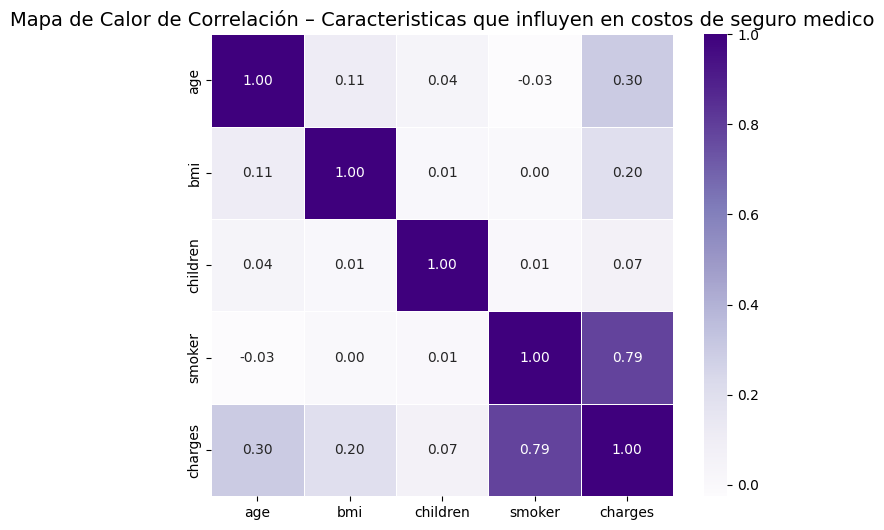

In [71]:
# Se filtran las variables numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación sólo con variables numéricas
matriz_correlacion = df_numerico.corr()

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Purples", square=True, linewidths=0.5)
plt.title("Mapa de Calor de Correlación – Caracteristicas que influyen en costos de seguro medico", fontsize=14)
plt.show()

####Analisis
- Segun lo observados, existe una fuerte correlacion entre la variable fumador y costo, lo que. nos confirma que la condicion de fumador influye fuertemente en el costo del seguro.
- La edad y el costo si bien tienen una correlacion esta es media, a myor edad mayor es el costo.
- En cuanto al imc influye pero debilmente com ouno pudiese imaginar.
- Y por ultimo la variale children y costo tiene una correlacion muy debil, por ende no afecta significativamente el costo del seguro.

## Diagnostico y Soluciónn del Problema

###Diagnostico

El dataset contiene información de asegurados, incluyendo edad, índice de masa corporal (BMI), número de hijos, hábito de fumar, sexo, región y el costo del seguro médico (charges).

La variable objetivo charges es numérica continua y representa el costo del seguro médico, influenciado por factores personales y de salud. Pero para entrenar modelos de clasificacion la transformaremos en binaria

No hay valores nulos y exitia un valor duplicado que fue eliminado. Se detectaron outliers significativos en variables como bmi y charges, que ya fueron identificados y se mantuvieron ya que no son valores erroneos y esta la posibilidad de que existan.

Se observan correlaciones relevantes:

smoker tiene correlación positiva fuerte con charges (0.79): fumar incrementa  el costo.

age tiene correlación moderada positiva con charges: personas mayores tienden a pagar más

bmi tien correlación débil positiva con charges: el sobrepeso influye, pero no fuertemente

Variables como children, sex y region muestran baja correlación con el costo, pero podrían aportar valor en modelos no lineales o segmentados

###Selección del problema: Clasificacion

Se transforma la variable charges en una variable binaria

Permite identificar perfiles de pacientes con riesgo financiero elevado.

Útil para segmentar clientes, ajustar primas de los seguros



##CORE7
Se continuará con el trabajo realizado en core anterior, si bien en primera instancia la variable objetivo era numerica cotninua por ende requeria de modelos regresivos, ahora y segun lo solicitado en este core (7) se cambiará a modelo de clasificación, si bien el eda esta listo, empezaremos por transformar la variable objetivo en binaria

In [72]:
# Se transforma charges en binaria, se comparará el valor de charges con la mediana de los valores y si el costo es mayor a la mediana será true y false si no ( true:1 - false:0) y se creará una nueva columna high_cost
df['high_cost'] = (df['charges'] > df['charges'].median()).astype(int)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   sex        1337 non-null   object 
 2   bmi        1337 non-null   float64
 3   children   1337 non-null   int64  
 4   smoker     1337 non-null   int64  
 5   region     1337 non-null   object 
 6   charges    1337 non-null   float64
 7   high_cost  1337 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 94.0+ KB


In [74]:
# Variables predictoras se definen features y target
X = df.drop(columns=['charges', 'high_cost'])
y = df['high_cost']

In [75]:
# Dividir en train y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Definir transformadores. Separar numéricas y categóricas
num_cols = ['age', 'bmi', 'children']
cat_cols = ['sex', 'smoker', 'region']

In [77]:
# Preprocesamiento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

##MODELO ARBOL DE DECISION

In [78]:
# Crear pipeline.
pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

In [79]:
# Entrenar modelo.
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [80]:
# Predecir y evaluar.
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.2f}")

Accuracy del modelo: 0.88


##MODELO REGRESION LOGISTICA

In [81]:
# Crear pipeline
pipeline_logreg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

In [82]:
# Entrenar modelo
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [83]:
# Predecir y evaluar
y_pred_logreg = pipeline_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy del modelo (Logistic Regression): {accuracy_logreg:.2f}")

Accuracy del modelo (Logistic Regression): 0.91


##MODELO KNN

In [84]:
# Crear pipeline
pipeline_knn = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier())
])

In [85]:
# Entrenar modelo
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('classifier', KNeighborsClassifier())])

In [86]:
# Predecir y evaluar
y_pred_knn = pipeline_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy del modelo (KNN): {accuracy_knn:.2f}")

Accuracy del modelo (KNN): 0.88


####Validación cruzada para evaluar el rendimiento inicial de los modelos

In [87]:
# Crearemos un diccionaio de los modelos utilizados

modelos = {
    'Regresion Logistica': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Arbol de Decision': DecisionTreeClassifier(random_state = 42)
}

#Evaluar cada modelo con validacion cruzada como se solicita
for nombre, modelo in modelos.items():
  pipeline = Pipeline([
      ("preprocessing", preprocessor),
      ("classifier", modelo)
  ])

  scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
  print(f"{nombre} - Accuracy CV: {scores.mean():.3f} ")

Regresion Logistica - Accuracy CV: 0.903 
KNN - Accuracy CV: 0.874 
Arbol de Decision - Accuracy CV: 0.885 


##Optimizacion de Hiperparametros GridSearchCV

#### Arbol de Decision

In [88]:
# Definir espacio de busqueda para el modelo
modelo_arbol = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Pipeline con procesamiento y modelo
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Aplicar GridSearchCV para encontrar la mejor combinación de hiperparametro
grid_tree = GridSearchCV(pipeline_tree, modelo_arbol, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

# mostrar los hiperparametros
print("Mejores parámetros Árbol (GridSearch):", grid_tree.best_params_)


Mejores parámetros Árbol (GridSearch): {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}


####Regresion Logistica

In [89]:
# Definir espacio de busqueda para el modelo
modelo_rl = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs']
}

# Pipeline con preprocesamiento y modelo
pipeline_logreg = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# aplicar GridSearchCV para encontrar la mejor combinacion
grid_logreg = GridSearchCV(pipeline_logreg, modelo_rl, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

# Mostrar los hiperparametros
print("Mejores parámetros Regresion Logistica (GridSearch):", grid_logreg.best_params_)


Mejores parámetros Regresion Logistica (GridSearch): {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


####Modelo KNN

In [90]:
# Definir espacio de busqueda para el modelo
modelo_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

# Pipeline con preprocesamiento y modelo
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", KNeighborsClassifier())
])

# aplicar GridSearchCV para encontrar la mejor combinacion
grid_knn = GridSearchCV(pipeline_knn, modelo_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
# Mostrar los hiperparametros
print("Mejores parámetros KNN (GridSearch):", grid_knn.best_params_)

Mejores parámetros KNN (GridSearch): {'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}


## Optimizacion de Hipeparametros con RandomizedSearchCV

####Modelo Arbol de Desicion

In [91]:
# espacio de busqueda aleatoria
param_dist_tree = {
    'classifier__max_depth': randint(2, 10), # profundidad del arbol
    'classifier__min_samples_split': randint(2, 10) # minimo de muestras para dividir
}
# aplicar randomizedSearchCV para encontrar los hiperparametros
random_tree = RandomizedSearchCV(pipeline_tree, param_dist_tree, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Se entrena la busqueda aleatoria
random_tree.fit(X_train, y_train)

# Mostrar los hiperparametros
print("Mejores parámetros modelo arbol de decisiones (RandomizedSearch):", random_tree.best_params_)

Mejores parámetros modelo arbol de decisiones (RandomizedSearch): {'classifier__max_depth': 5, 'classifier__min_samples_split': 9}


####Modelo Regresion Logistica

In [92]:
# RandomizedSearchCV
random_logreg = RandomizedSearchCV(
    pipeline_logreg,
    param_distributions=modelo_rl,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Entrenar y mostrar mejores parámetros
random_logreg.fit(X_train, y_train)
print("Mejores parámetros LogReg (RandomizedSearch):", random_logreg.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros LogReg (RandomizedSearch): {'classifier__solver': 'lbfgs', 'classifier__penalty': 'l2', 'classifier__C': 10}


####Modelo KNN

In [93]:
# Definir el espacio de busqueda aleatoria para el modelo
param_dist_knn = {
    'classifier__n_neighbors': randint(3, 15), # numero de vecinos a considerar
    'classifier__weights': ['uniform', 'distance'] # tipo de ponderacion de vecinos
}

# aplicar randomizedSearchCV para encontrar los hiperparametros
random_knn = RandomizedSearchCV(pipeline_knn, param_dist_knn, cv=5, scoring='accuracy', n_iter=10, random_state=42)
# entrenar la busqueda aleatoria
random_knn.fit(X_train, y_train)
# Mostrar los hiperparametros
print("Mejores parámetros KNN (RandomizedSearch):", random_knn.best_params_)

Mejores parámetros KNN (RandomizedSearch): {'classifier__n_neighbors': 13, 'classifier__weights': 'distance'}


### COMPARACION DE RESULTADOS

In [94]:
# Se compara el accuracy obtenido por GridSearchCV y RandomizedSearchCV
print("\nComparación de Accuracy optimizado:\n")
# KNN
print(f"KNN GridSearch: {grid_knn.best_score_:.3f}")
print(f"KNN RandomizedSearch: {random_knn.best_score_:.3f}\n")
# Arbol de Decision
print(f"Arbol de Decision GridSearch: {grid_tree.best_score_:.3f}")
print(f"Arbol de Decision RandomizedSearch: {random_tree.best_score_:.3f}\n")
# Regresion Logistica
print(f"Regresion Logistica  GridSearch: {grid_logreg.best_score_:.3f}")
print(f"Regresion Logistica RandomizedSearch: {random_logreg.best_score_:.3f}")



Comparación de Accuracy optimizado:

KNN GridSearch: 0.883
KNN RandomizedSearch: 0.889

Arbol de Decision GridSearch: 0.919
Arbol de Decision RandomizedSearch: 0.919

Regresion Logistica  GridSearch: 0.905
Regresion Logistica RandomizedSearch: 0.905


##EVALUACION DE LOS MODELOS



Accuracy	Porcentaje de predicciones correctas.
Precision	De los que predijo como “alto costo”, ¿cuántos realmente lo eran?
Recall	De todos los que eran “alto costo”, ¿cuántos detectó el modelo?
F1-Score	Equilibrio entre precisión y recall.
ROC-AUC	Qué tan bien el modelo separa las clases (0 vs 1), sin importar el umbral.

In [95]:
# función para mostrar las metricas solicitadas para la evalaucion de los modelos
def evaluar_modelo(modelo, X_test, y_test, nombre):
# Predicciones y probabilidades
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

# Mostrar por consola las metricas
    print(f"\n🔍 Evaluación del modelo: {nombre}")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.3f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.3f}")
    print(f"ROC AUC:   {roc_auc_score(y_test, y_prob):.3f}")

In [96]:
# Se evalua para cada modelo optmizado
evaluar_modelo(grid_knn.best_estimator_, X_test, y_test, "KNN (GridSearch)")
evaluar_modelo(grid_tree.best_estimator_, X_test, y_test, "Árbol (GridSearch)")
evaluar_modelo(grid_logreg.best_estimator_, X_test, y_test, "LogReg (GridSearch)")


🔍 Evaluación del modelo: KNN (GridSearch)
Accuracy:  0.877
Precision: 0.893
Recall:    0.860
F1 Score:  0.876
ROC AUC:   0.934

🔍 Evaluación del modelo: Árbol (GridSearch)
Accuracy:  0.929
Precision: 0.968
Recall:    0.890
F1 Score:  0.927
ROC AUC:   0.938

🔍 Evaluación del modelo: LogReg (GridSearch)
Accuracy:  0.910
Precision: 0.894
Recall:    0.934
F1 Score:  0.914
ROC AUC:   0.966


#### Generar matriz de Confusion para modelos optimizados


In [97]:
# Funcion para graficar la matriz de confusión de los modelos
def matriz_confusion(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

# graficar la matriz de confusion como un mapa de calor
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusión – {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
# mostrar ek grafico
    plt.show()

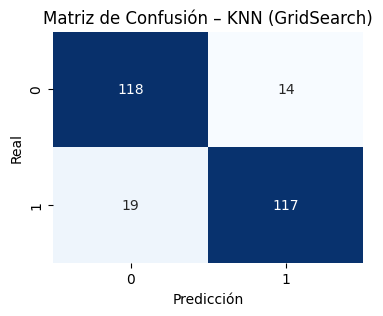

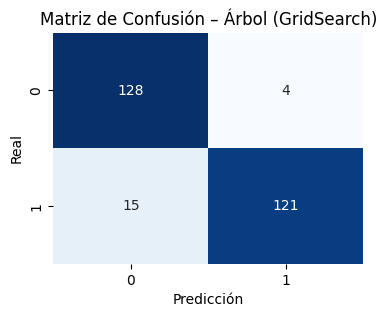

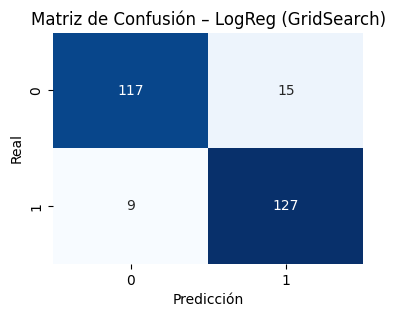

In [98]:
# Mostrar el grafico de confusion para cada uno de los modelos optimizados
matriz_confusion(grid_knn.best_estimator_, X_test, y_test, "KNN (GridSearch)")
matriz_confusion(grid_tree.best_estimator_, X_test, y_test, "Árbol (GridSearch)")
matriz_confusion(grid_logreg.best_estimator_, X_test, y_test, "LogReg (GridSearch)")


### Analisis

- Matriz de confusion KNN: mantiene 118 negativos y 117 positivos, lo que podria estar indicando que clasifica correctamente gran parte de los casos, sin emabrgo presenta 14 falsos positivos y 19 falsos negativos, este quiere decir que si bien tiene una precision aceptable esta pordria mejorar.

- Matriz de confusion Arbol de Decisiones: maniene 128 casos negativos (bajo costo) y 121 casos positivos(alto costo) lo que nos indicaria una alta capacidad para distinguir entre ambas clases y los errores fueron minimos, 4 falsos positivos y 15 falsos negativos

- Matriz de confusion de regresion logistica: mantiene 117 casos negativos y 127 casos positivos lo que nos indicaria alta capacidad para distinguir ambas clases, los errores fueron mas bien bajos 15 falsos positivos y 9 falsos negativos. Esto nos sugiere una buena sensibilidad ya que detecta la mayoria de los casos positivos.

#### Generar curva ROC para modelos optimizados

In [99]:
# Función para graficar la curva ROC del modelo
def curva_roc(modelo, X_test, y_test, nombre):
 # Muestra la capacidad del modelo para distinguir entre clases
    RocCurveDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Curva ROC – {nombre}")
  # Mostrar el grafico
    plt.show()

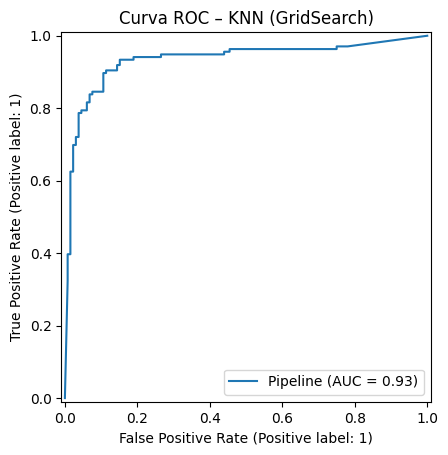

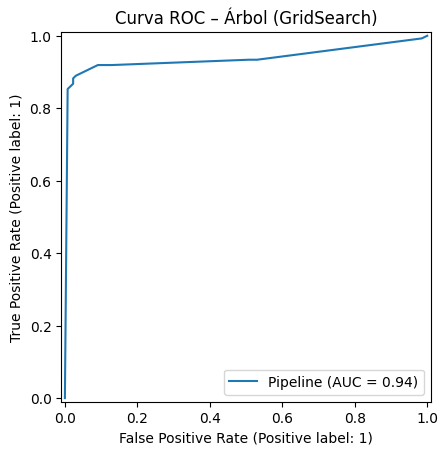

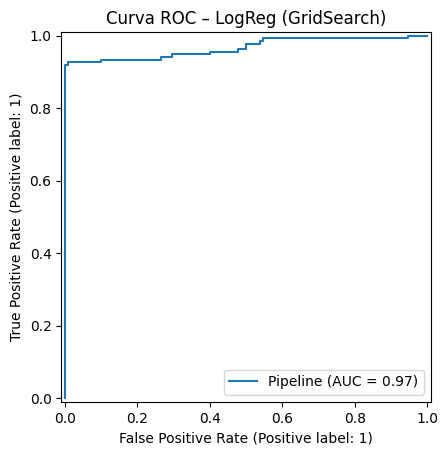

In [100]:
# Visualizar curva ROC para cada modelo optimizado
curva_roc(grid_knn.best_estimator_, X_test, y_test, "KNN (GridSearch)")
curva_roc(grid_tree.best_estimator_, X_test, y_test, "Árbol (GridSearch)")
curva_roc(grid_logreg.best_estimator_, X_test, y_test, "LogReg (GridSearch)")

### Analisis
- Curva ROC KNN: La curva ROC del modelo KNN muestra una capacidad de discriminación muy alta, con un AUC de 0.93. Esto significa que el modelo distingue correctamente entre clases positivas y negativas en el 93% de los casos, independientemente del umbral de decisión.

- Curva Roc Arbol de Desiciones: La curva ROC del modelo muestra una excelente capacidad de discriminación, con un AUC de 0.94. Esto significa que el modelo distingue correctamente entre clases positivas y negativas en el 94% de los casos, lo cual es un indicador fuerte de rendimiento.

- Curva ROC Regresion Logistica: La curva ROC muestra un rendimiento sobresaliente, con un AUC de 0.97, lo que indica que el modelo distingue correctamente entre clases positivas y negativas en el 97% de los casos. Esta puntuación refleja una capacidad de discriminación excepcional, superior incluso a los otros modelos evaluados.